## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9702724	total: 47.7ms	remaining: 47.7s
1:	learn: 0.9500787	total: 48.9ms	remaining: 24.4s
2:	learn: 0.9299330	total: 49.8ms	remaining: 16.6s
3:	learn: 0.9116810	total: 50.8ms	remaining: 12.6s
4:	learn: 0.8917589	total: 51.9ms	remaining: 10.3s
5:	learn: 0.8737186	total: 53ms	remaining: 8.77s
6:	learn: 0.8589189	total: 54.1ms	remaining: 7.68s
7:	learn: 0.8419367	total: 55.1ms	remaining: 6.84s
8:	learn: 0.8264494	total: 56.2ms	remaining: 6.19s
9:	learn: 0.8095681	total: 57.2ms	remaining: 5.67s
10:	learn: 0.7962654	total: 58.2ms	remaining: 5.24s
11:	learn: 0.7815940	total: 59.3ms	remaining: 4.88s
12:	learn: 0.7661995	total: 60.4ms	remaining: 4.58s
13:	learn: 0.7506767	total: 61.4ms	remaining: 4.33s
14:	learn: 0.7383714	total: 62.6ms	remaining: 4.11s
15:	learn: 0.7238213	total: 63.6ms	remaining: 3.91s
16:	learn: 0.7118246	total: 64.7ms	remaining: 3.74s
17:	learn: 0.6989783	total: 65.8ms	remaining: 3.59s
18:	learn: 0.6863822	total: 66.9ms	remaining: 3

88:	learn: 0.3261305	total: 142ms	remaining: 1.45s
89:	learn: 0.3241404	total: 143ms	remaining: 1.45s
90:	learn: 0.3221514	total: 144ms	remaining: 1.44s
91:	learn: 0.3209992	total: 145ms	remaining: 1.43s
92:	learn: 0.3199235	total: 146ms	remaining: 1.43s
93:	learn: 0.3187925	total: 148ms	remaining: 1.42s
94:	learn: 0.3170916	total: 149ms	remaining: 1.42s
95:	learn: 0.3158025	total: 150ms	remaining: 1.41s
96:	learn: 0.3143956	total: 151ms	remaining: 1.4s
97:	learn: 0.3120258	total: 152ms	remaining: 1.4s
98:	learn: 0.3102421	total: 153ms	remaining: 1.39s
99:	learn: 0.3084222	total: 154ms	remaining: 1.39s
100:	learn: 0.3066328	total: 155ms	remaining: 1.38s
101:	learn: 0.3046680	total: 156ms	remaining: 1.38s
102:	learn: 0.3032143	total: 157ms	remaining: 1.37s
103:	learn: 0.3020453	total: 159ms	remaining: 1.36s
104:	learn: 0.3009408	total: 160ms	remaining: 1.36s
105:	learn: 0.2995615	total: 161ms	remaining: 1.35s
106:	learn: 0.2980348	total: 162ms	remaining: 1.35s
107:	learn: 0.2963622	tota

214:	learn: 0.2098796	total: 277ms	remaining: 1.01s
215:	learn: 0.2089464	total: 279ms	remaining: 1.01s
216:	learn: 0.2082147	total: 280ms	remaining: 1.01s
217:	learn: 0.2076933	total: 281ms	remaining: 1.01s
218:	learn: 0.2074434	total: 282ms	remaining: 1s
219:	learn: 0.2070364	total: 283ms	remaining: 1s
220:	learn: 0.2061917	total: 284ms	remaining: 1s
221:	learn: 0.2057366	total: 285ms	remaining: 999ms
222:	learn: 0.2052250	total: 286ms	remaining: 997ms
223:	learn: 0.2048868	total: 287ms	remaining: 995ms
224:	learn: 0.2043530	total: 288ms	remaining: 992ms
225:	learn: 0.2038823	total: 289ms	remaining: 990ms
226:	learn: 0.2034438	total: 290ms	remaining: 989ms
227:	learn: 0.2029557	total: 292ms	remaining: 987ms
228:	learn: 0.2024576	total: 293ms	remaining: 986ms
229:	learn: 0.2019786	total: 294ms	remaining: 984ms
230:	learn: 0.2017854	total: 295ms	remaining: 982ms
231:	learn: 0.2012026	total: 296ms	remaining: 979ms
232:	learn: 0.2008904	total: 297ms	remaining: 977ms
233:	learn: 0.2005238

330:	learn: 0.1628914	total: 409ms	remaining: 827ms
331:	learn: 0.1623422	total: 411ms	remaining: 826ms
332:	learn: 0.1620838	total: 412ms	remaining: 824ms
333:	learn: 0.1617265	total: 413ms	remaining: 823ms
334:	learn: 0.1614378	total: 414ms	remaining: 821ms
335:	learn: 0.1610630	total: 415ms	remaining: 820ms
336:	learn: 0.1608849	total: 416ms	remaining: 818ms
337:	learn: 0.1603588	total: 417ms	remaining: 817ms
338:	learn: 0.1599547	total: 418ms	remaining: 815ms
339:	learn: 0.1594727	total: 420ms	remaining: 815ms
340:	learn: 0.1591413	total: 421ms	remaining: 814ms
341:	learn: 0.1585887	total: 422ms	remaining: 813ms
342:	learn: 0.1583264	total: 424ms	remaining: 811ms
343:	learn: 0.1581765	total: 425ms	remaining: 810ms
344:	learn: 0.1580343	total: 426ms	remaining: 808ms
345:	learn: 0.1575778	total: 427ms	remaining: 807ms
346:	learn: 0.1573131	total: 428ms	remaining: 806ms
347:	learn: 0.1568007	total: 429ms	remaining: 804ms
348:	learn: 0.1563986	total: 430ms	remaining: 803ms
349:	learn: 

452:	learn: 0.1301689	total: 545ms	remaining: 658ms
453:	learn: 0.1298856	total: 546ms	remaining: 657ms
454:	learn: 0.1296648	total: 547ms	remaining: 655ms
455:	learn: 0.1294988	total: 548ms	remaining: 654ms
456:	learn: 0.1291614	total: 549ms	remaining: 653ms
457:	learn: 0.1288513	total: 550ms	remaining: 651ms
458:	learn: 0.1285834	total: 551ms	remaining: 650ms
459:	learn: 0.1283295	total: 552ms	remaining: 648ms
460:	learn: 0.1280947	total: 554ms	remaining: 647ms
461:	learn: 0.1277996	total: 555ms	remaining: 646ms
462:	learn: 0.1275988	total: 556ms	remaining: 645ms
463:	learn: 0.1275261	total: 557ms	remaining: 643ms
464:	learn: 0.1273762	total: 558ms	remaining: 642ms
465:	learn: 0.1271374	total: 559ms	remaining: 641ms
466:	learn: 0.1268687	total: 560ms	remaining: 639ms
467:	learn: 0.1267416	total: 561ms	remaining: 638ms
468:	learn: 0.1266803	total: 562ms	remaining: 637ms
469:	learn: 0.1263736	total: 563ms	remaining: 635ms
470:	learn: 0.1262903	total: 565ms	remaining: 634ms
471:	learn: 

575:	learn: 0.1059566	total: 680ms	remaining: 501ms
576:	learn: 0.1059116	total: 682ms	remaining: 500ms
577:	learn: 0.1057285	total: 683ms	remaining: 499ms
578:	learn: 0.1057031	total: 684ms	remaining: 497ms
579:	learn: 0.1056547	total: 685ms	remaining: 496ms
580:	learn: 0.1054291	total: 686ms	remaining: 495ms
581:	learn: 0.1051924	total: 687ms	remaining: 493ms
582:	learn: 0.1050408	total: 688ms	remaining: 492ms
583:	learn: 0.1047820	total: 689ms	remaining: 491ms
584:	learn: 0.1045130	total: 690ms	remaining: 490ms
585:	learn: 0.1044517	total: 691ms	remaining: 488ms
586:	learn: 0.1043251	total: 692ms	remaining: 487ms
587:	learn: 0.1041194	total: 693ms	remaining: 486ms
588:	learn: 0.1038424	total: 694ms	remaining: 484ms
589:	learn: 0.1036195	total: 695ms	remaining: 483ms
590:	learn: 0.1034501	total: 696ms	remaining: 482ms
591:	learn: 0.1032764	total: 697ms	remaining: 480ms
592:	learn: 0.1031776	total: 698ms	remaining: 479ms
593:	learn: 0.1029791	total: 699ms	remaining: 478ms
594:	learn: 

696:	learn: 0.0890649	total: 811ms	remaining: 353ms
697:	learn: 0.0890417	total: 812ms	remaining: 351ms
698:	learn: 0.0890108	total: 813ms	remaining: 350ms
699:	learn: 0.0888837	total: 814ms	remaining: 349ms
700:	learn: 0.0887955	total: 815ms	remaining: 348ms
701:	learn: 0.0887629	total: 816ms	remaining: 347ms
702:	learn: 0.0886010	total: 817ms	remaining: 345ms
703:	learn: 0.0885861	total: 818ms	remaining: 344ms
704:	learn: 0.0885488	total: 820ms	remaining: 343ms
705:	learn: 0.0884345	total: 821ms	remaining: 342ms
706:	learn: 0.0883060	total: 821ms	remaining: 340ms
707:	learn: 0.0881780	total: 822ms	remaining: 339ms
708:	learn: 0.0879843	total: 823ms	remaining: 338ms
709:	learn: 0.0879668	total: 824ms	remaining: 337ms
710:	learn: 0.0877884	total: 826ms	remaining: 336ms
711:	learn: 0.0877775	total: 827ms	remaining: 334ms
712:	learn: 0.0875303	total: 828ms	remaining: 333ms
713:	learn: 0.0874600	total: 829ms	remaining: 332ms
714:	learn: 0.0873345	total: 830ms	remaining: 331ms
715:	learn: 

821:	learn: 0.0751827	total: 943ms	remaining: 204ms
822:	learn: 0.0750986	total: 944ms	remaining: 203ms
823:	learn: 0.0749110	total: 945ms	remaining: 202ms
824:	learn: 0.0748474	total: 946ms	remaining: 201ms
825:	learn: 0.0746686	total: 947ms	remaining: 200ms
826:	learn: 0.0745939	total: 948ms	remaining: 198ms
827:	learn: 0.0744523	total: 949ms	remaining: 197ms
828:	learn: 0.0743257	total: 951ms	remaining: 196ms
829:	learn: 0.0742286	total: 952ms	remaining: 195ms
830:	learn: 0.0741415	total: 953ms	remaining: 194ms
831:	learn: 0.0740115	total: 954ms	remaining: 193ms
832:	learn: 0.0739593	total: 955ms	remaining: 191ms
833:	learn: 0.0738364	total: 956ms	remaining: 190ms
834:	learn: 0.0736902	total: 957ms	remaining: 189ms
835:	learn: 0.0735445	total: 958ms	remaining: 188ms
836:	learn: 0.0734855	total: 959ms	remaining: 187ms
837:	learn: 0.0734761	total: 960ms	remaining: 186ms
838:	learn: 0.0734281	total: 961ms	remaining: 184ms
839:	learn: 0.0732944	total: 962ms	remaining: 183ms
840:	learn: 

942:	learn: 0.0638955	total: 1.07s	remaining: 64.8ms
943:	learn: 0.0638906	total: 1.07s	remaining: 63.6ms
944:	learn: 0.0638099	total: 1.07s	remaining: 62.5ms
945:	learn: 0.0637223	total: 1.07s	remaining: 61.4ms
946:	learn: 0.0636289	total: 1.08s	remaining: 60.2ms
947:	learn: 0.0635797	total: 1.08s	remaining: 59.1ms
948:	learn: 0.0635633	total: 1.08s	remaining: 58ms
949:	learn: 0.0634553	total: 1.08s	remaining: 56.8ms
950:	learn: 0.0634493	total: 1.08s	remaining: 55.7ms
951:	learn: 0.0633362	total: 1.08s	remaining: 54.5ms
952:	learn: 0.0631558	total: 1.08s	remaining: 53.4ms
953:	learn: 0.0630585	total: 1.08s	remaining: 52.3ms
954:	learn: 0.0630260	total: 1.08s	remaining: 51.1ms
955:	learn: 0.0630204	total: 1.08s	remaining: 50ms
956:	learn: 0.0629399	total: 1.09s	remaining: 48.8ms
957:	learn: 0.0627960	total: 1.09s	remaining: 47.7ms
958:	learn: 0.0627425	total: 1.09s	remaining: 46.6ms
959:	learn: 0.0626062	total: 1.09s	remaining: 45.5ms
960:	learn: 0.0625975	total: 1.09s	remaining: 44.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

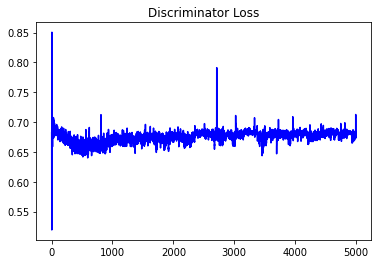

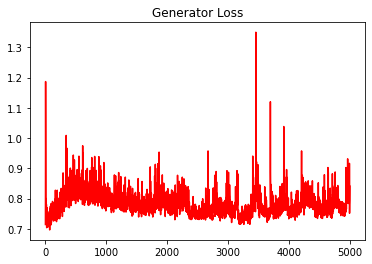

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

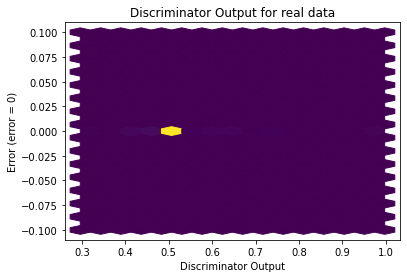

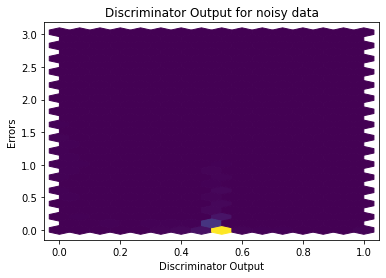

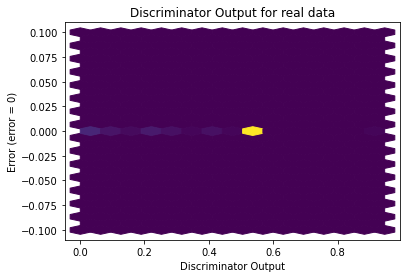

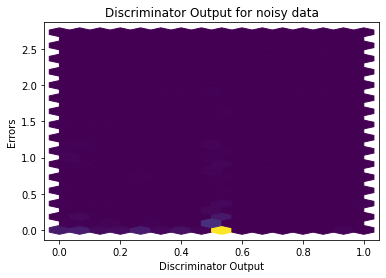

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


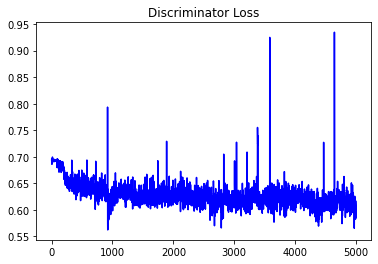

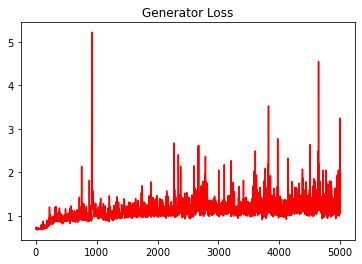

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

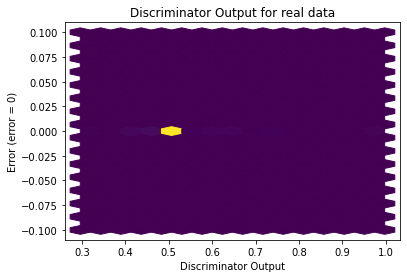

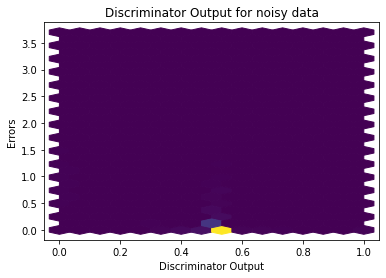

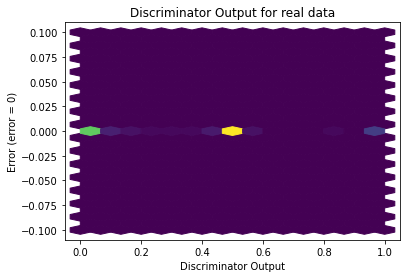

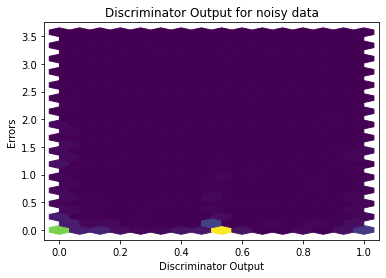

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9919]], device='cuda:0', requires_grad=True)
